In [1]:
print("Ajay Kumar")

Ajay Kumar


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
url="E:/assignment/dsbda/5/Social_Network_Ads.csv"
df = pd.read_csv(url)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df = df.drop('User ID', axis = 1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [41]:
X = df.iloc[:, [1, 2]].values
y = df.iloc[:, 3].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [23]:
# Predicting the Test set results
y_pred = log_reg.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8888888888888888
0.75


In [26]:
print(confusion_matrix(y_test, y_pred))
tp,fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print(f'Correctly Predicted made Purchase {tp}')
print(f'Falsely Predicted made Purchase {fp}')
print(f'Falsely Predicted made did NOT made Purchase {fn}')
print(f'Correctly Predicted made did NOT made Purchase {tn}')

[[65  3]
 [ 8 24]]
Correctly Predicted made Purchase 65
Falsely Predicted made Purchase 3
Falsely Predicted made did NOT made Purchase 8
Correctly Predicted made did NOT made Purchase 24


In [44]:
accuracy_score(y_test, y_pred)

0.89

In [66]:
#print the tested and predicted value
dataf = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
dataf

,Real Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


In [31]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



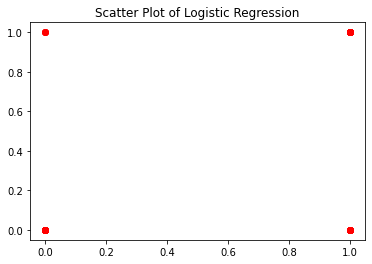

In [46]:

#don't do this in exam,unless external ask

plt.scatter(y_test, y_pred, c="red", cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()